In [1]:
from scipy.io import loadmat
import numpy as np
from nilearn import *
import nilearn
import matplotlib.pyplot as plt

In [2]:
# Set parameters

subjects = ["303","378","386","820","1092","1093","1171","1352","1511","1629"]
S = len(subjects)

methods = ['Sim','Pear','Smooth','Spar']
M = len(methods)

Graphs303_Sparsity = loadmat('../normalize_graphs/normalized_graphs/303_normalizedGraphs.mat')
Graphs303Spar_out = Graphs303_Sparsity['graphOut']
Graphs303Spar = Graphs303Spar_out['Spar'][0][0]

N,_,T = Graphs303Spar.shape

In [3]:
# Read MOVIE 1 data

Graphs_M1 = np.zeros((N,N,T,S,M))

for s in range(S):
    subject = subjects[s]

    s1 = '../normalize_graphs/normalized_graphs/'
    s2 = '_normalizedGraphs.mat'
    sub = s1 + subject + s2

    temp = loadmat(sub)
    temp_extracted = temp['graphOut']
    
    for m in range(M):
        method = methods[m]
        
        Graphs_M1[:,:,:,s,m] = temp_extracted[method][0][0]

# Read Resting State data

Graphs_RS = np.zeros((N,N,S,M))

for s in range(S):
    subject = subjects[s]

    s1 = '../normalize_graphs/normalized_graphs/'
    s2 = '_normalizedGraphs_RS.mat'
    sub = s1 + subject + s2

    temp = loadmat(sub)
    temp_extracted = temp['graphOut']
    
    for m in range(M):
        method = methods[m]
        
        Graphs_RS[:,:,s,m] = temp_extracted[method][0][0]

C:\Users\sasan\AppData\Local\Temp\ipykernel_16616\1263163011.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  Graphs_M1[:,:,:,s,m] = temp_extracted[method][0][0]


In [4]:
layouts = loadmat('../extract_data/nodeLayout.mat')
layout = layouts['locs']

node = np.array([4001, 4002, 4201, 4202, 6221, 6222, 2301, 2302, 2321, 2322, 2311, 2312, 2611, 2612, 2201, 2211, 2212, 2202, 2101, 2601, 2602, 2111, 2112, 2102, 5401, 5402, 4101, 4102, 3001, 3002, 5302, 5301, 5201, 5202, 5101, 5102, 4111, 4112, 6201, 6202, 6101, 6102, 4021, 4022, 6301, 6302, 6211, 6212, 8301, 8111, 8112, 8302, 7101, 7102]);

In [5]:
def thres(A1,k,Num):
    A = A1
    A2 = A1
    A = np.real(A)
    N = A.shape[0]
    P = A[np.triu_indices(N, k=1)]
    S = np.sort(np.ravel(P))[::-1] # symmetric, upper triangle
    val = S[k-1]
    K = k-2
    
    while(val==0 and K>=0):
        val = S[K]
        K -= 1
    
    W1 = A2
    W1 = np.where(W1 > val, 1, 0)
    
    top = A2
    val1 = S[Num]
    W2 = np.where(top > val1, 10, 0)
    
    W = np.maximum(W1,W2)
    
    return W

In [6]:
K = 5 # Number of edges to threshold

In [7]:
colormap = plt.get_cmap('hsv')

In [8]:
# Index for empathy HIGH and LOW
# MOVIE 1
idxHigh = 240 
idxLow = 75 

In [9]:
# Pick graphs for empathy LOW, HIGH and all-time average

Graphs_M1_all_HIGH = Graphs_M1[:,:,idxHigh,:,:]
Graphs_M1_HIGH = np.sum(Graphs_M1_all_HIGH,axis=2)/S
Graphs_M1_Time_Avg = np.sum(Graphs_M1,axis=2)/T
Graphs_M1_Avg = np.sum(Graphs_M1_Time_Avg,axis=2)/S
Graphs_M1_all_LOW = Graphs_M1[:,:,idxLow,:,:]
Graphs_M1_LOW = np.sum(Graphs_M1_all_LOW,axis=2)/S

Graphs_RS_Avg = np.sum(Graphs_RS,axis=2)/S

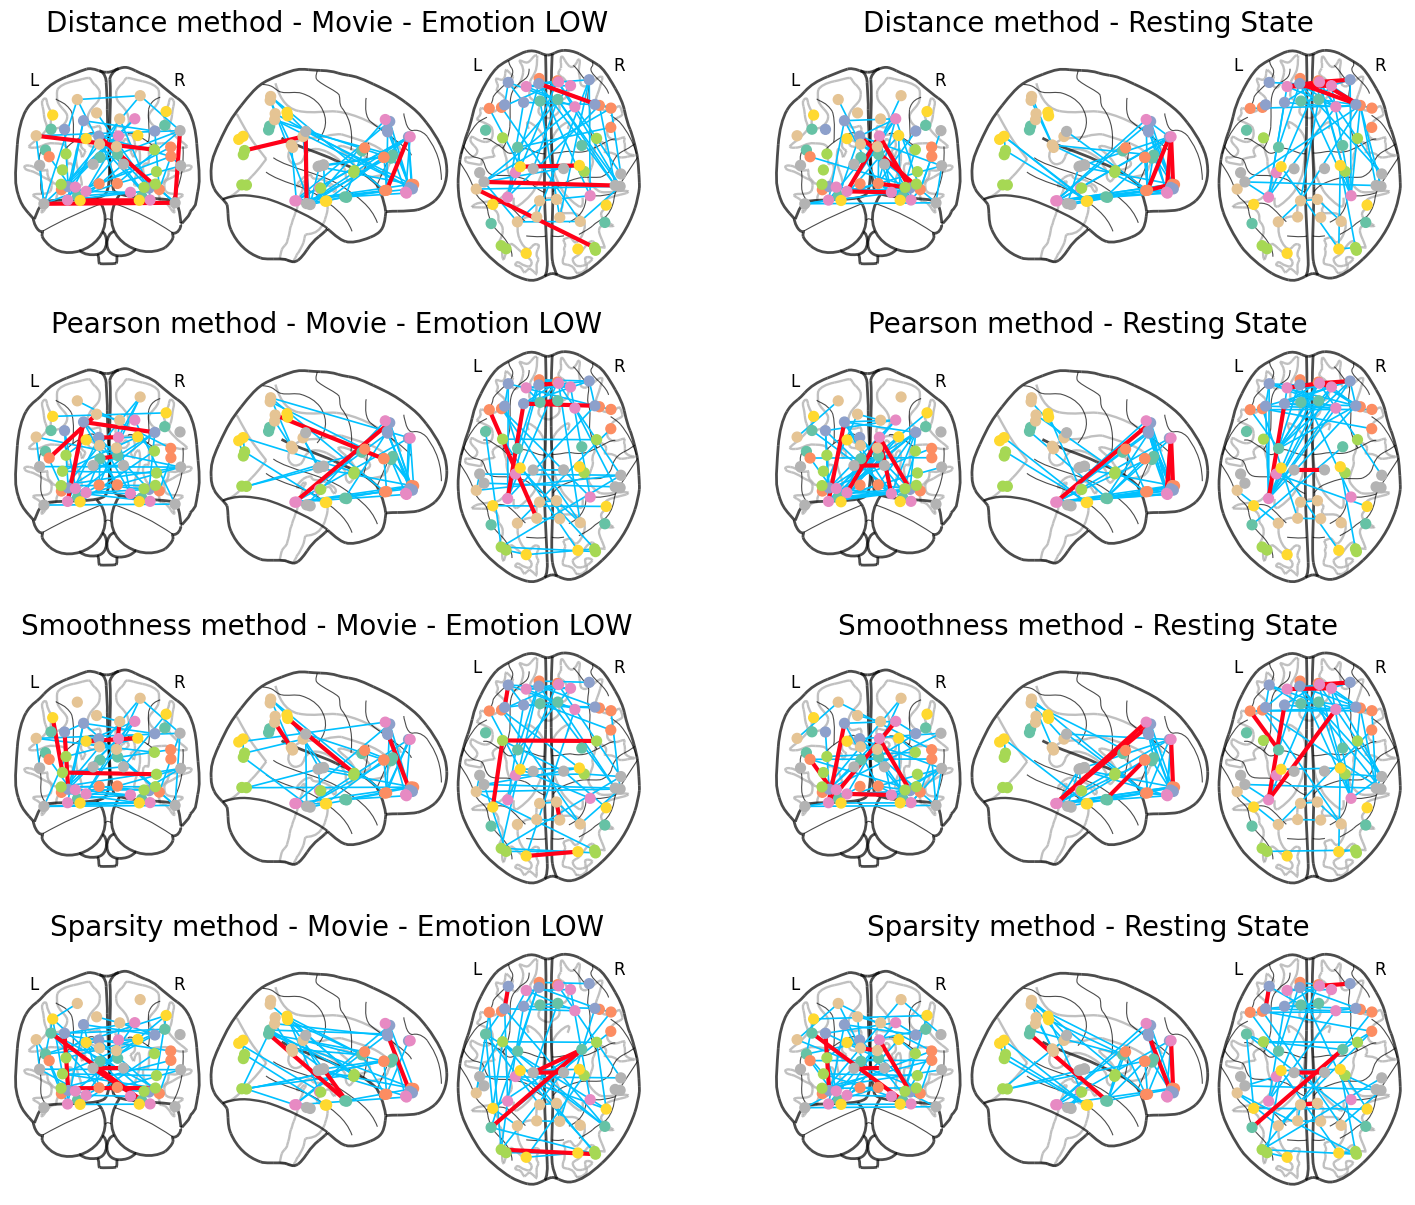

In [10]:
# Compare methods, empathy LOW and RS

methods1 = ['Distance','Pearson','Smoothness','Sparsity']

Graphs_plot_1 = Graphs_M1_LOW
Graphs_plot_2 = Graphs_RS_Avg

for i in range(M):
    Graphs_plot_1[:,:,i] = thres(Graphs_plot_1[:,:,i],N,K)
    Graphs_plot_2[:,:,i] = thres(Graphs_plot_2[:,:,i],N,K)

fig, axes = plt.subplots(nrows=M, ncols=2, figsize=(18,15))

for i in range(M):
    nilearn.plotting.plot_connectome(Graphs_plot_1[:,:,i],layout,edge_cmap=colormap,axes=axes[i][0])
    nilearn.plotting.plot_connectome(Graphs_plot_2[:,:,i],layout,edge_cmap=colormap,axes=axes[i][1])
    axes[i][0].set_title(methods1[i] + ' method - Movie - Emotion LOW',fontsize=20)
    axes[i][1].set_title(methods1[i] + ' method - Resting State',fontsize=20)

plt.savefig("EmpathyLOW_MovieVSResting.pdf", format="pdf", bbox_inches="tight")
plt.show()

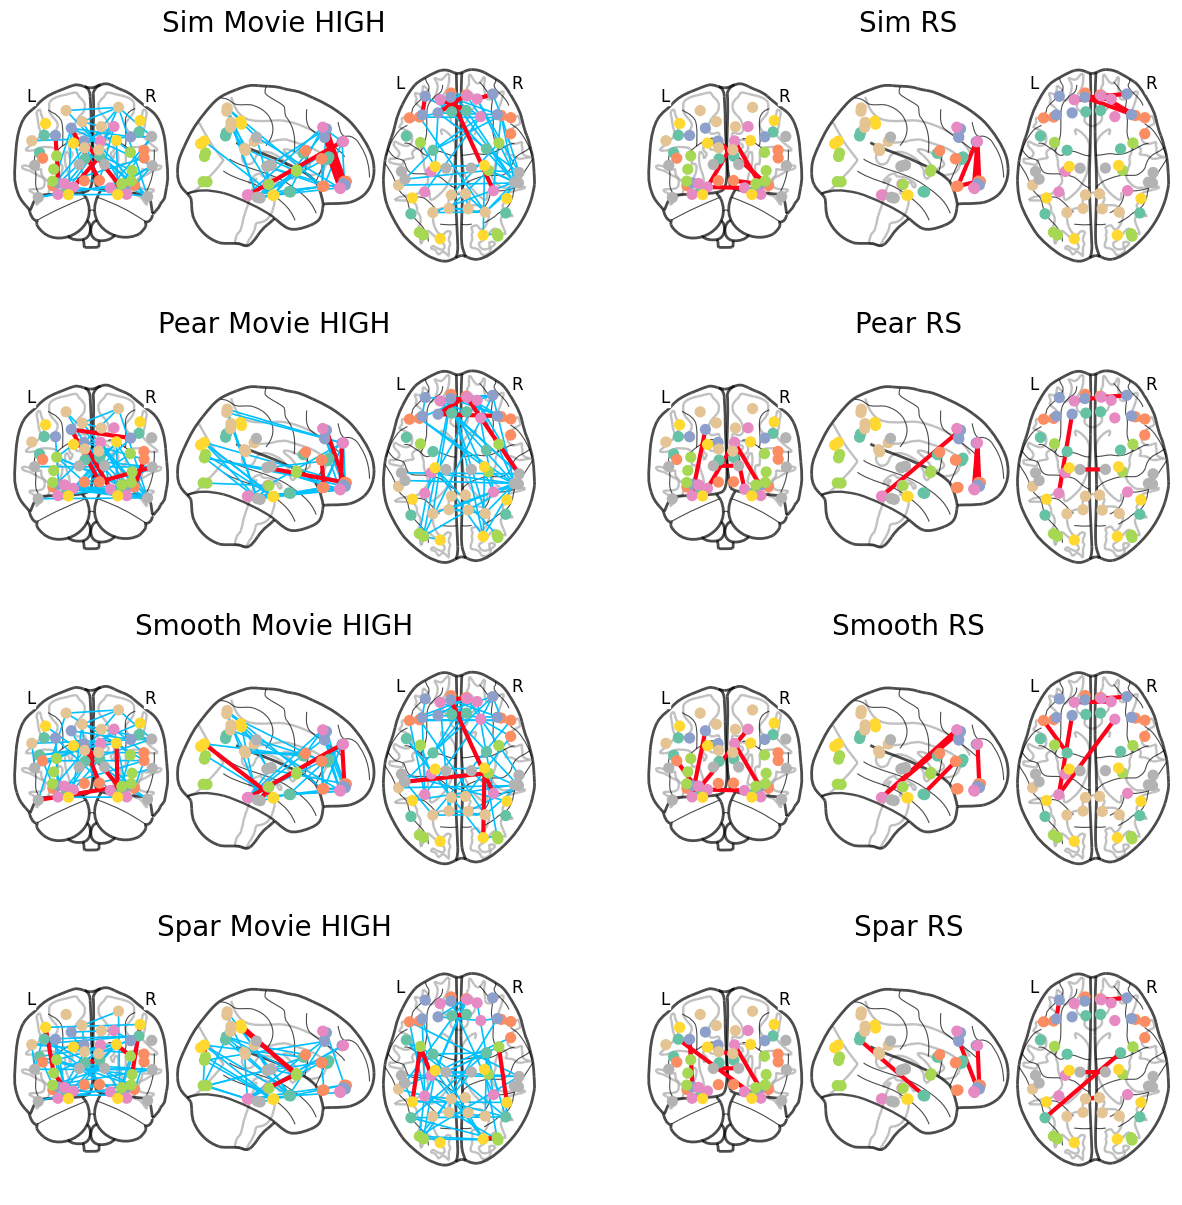

In [11]:
# Compare methods, empathy HIGH and RS

Graphs_plot_1 = Graphs_M1_HIGH
Graphs_plot_2 = Graphs_RS_Avg

for i in range(M):
    Graphs_plot_1[:,:,i] = thres(Graphs_plot_1[:,:,i],N,K)
    Graphs_plot_2[:,:,i] = thres(Graphs_plot_2[:,:,i],N,K)

fig, axes = plt.subplots(nrows=M, ncols=2, figsize=(15,15))

for i in range(M):
    nilearn.plotting.plot_connectome(Graphs_plot_1[:,:,i],layout,edge_cmap=colormap,axes=axes[i][0])
    nilearn.plotting.plot_connectome(Graphs_plot_2[:,:,i],layout,edge_cmap=colormap,axes=axes[i][1])
    axes[i][0].set_title(methods[i] + ' Movie HIGH',fontsize=20)
    axes[i][1].set_title(methods[i] + ' RS',fontsize=20)

plt.savefig("EmpathyHIGH_MovieVSResting.pdf", format="pdf", bbox_inches="tight")
plt.show()

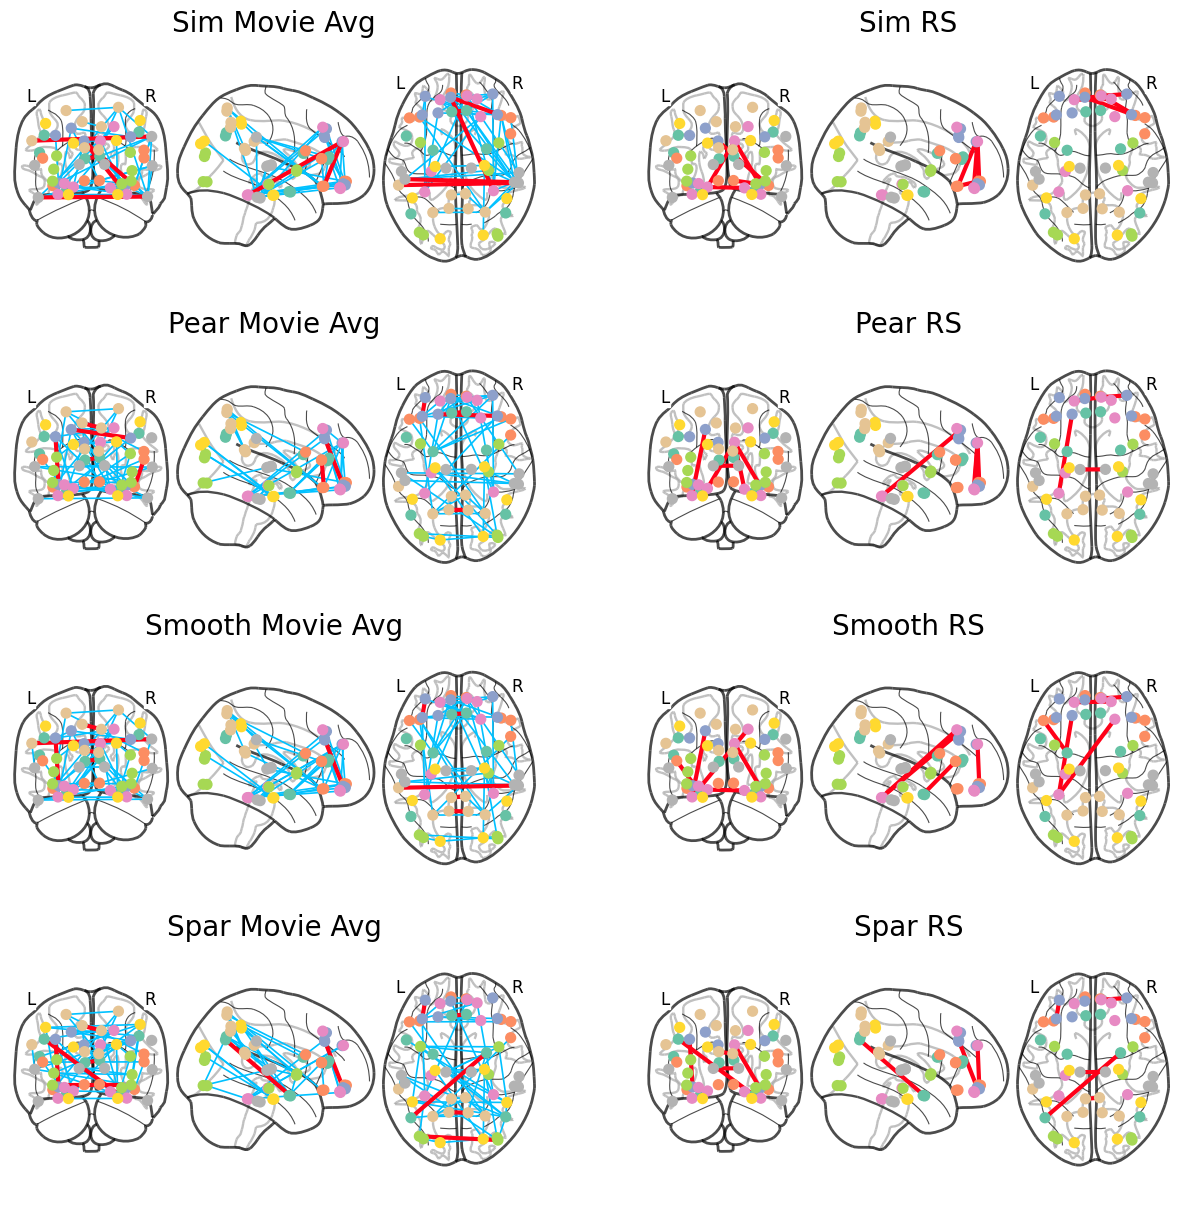

In [12]:
# Compare methods, avg and RS

Graphs_plot_1 = Graphs_M1_Avg
Graphs_plot_2 = Graphs_RS_Avg

for i in range(M):
    Graphs_plot_1[:,:,i] = thres(Graphs_plot_1[:,:,i],N,K)
    Graphs_plot_2[:,:,i] = thres(Graphs_plot_2[:,:,i],N,K)

fig, axes = plt.subplots(nrows=M, ncols=2, figsize=(15,15))

for i in range(M):
    nilearn.plotting.plot_connectome(Graphs_plot_1[:,:,i],layout,edge_cmap=colormap,axes=axes[i][0])
    nilearn.plotting.plot_connectome(Graphs_plot_2[:,:,i],layout,edge_cmap=colormap,axes=axes[i][1])
    axes[i][0].set_title(methods[i] + ' Movie Avg',fontsize=20)
    axes[i][1].set_title(methods[i] + ' RS',fontsize=20)

plt.savefig("Avg_MovieVSResting.pdf", format="pdf", bbox_inches="tight")
plt.show()

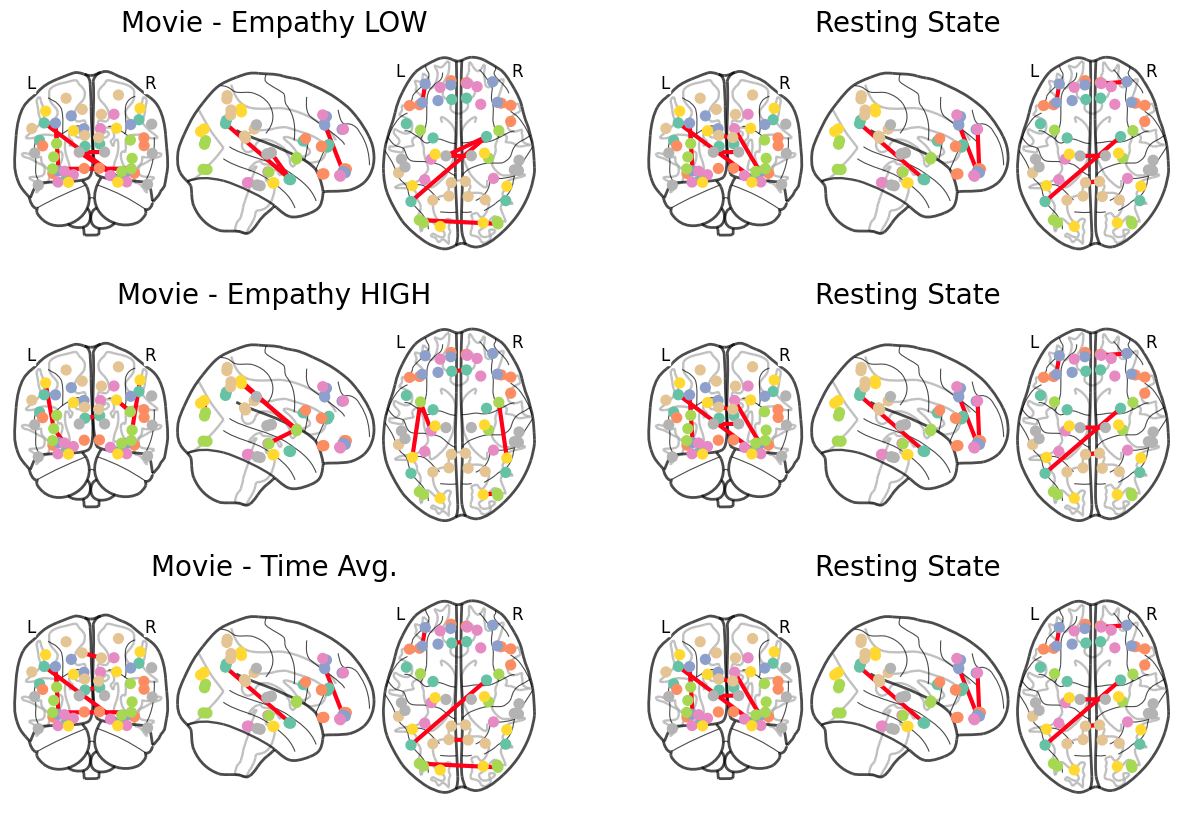

In [13]:
# Compare methods, avg and RS

Graphs_plot_00 = thres(Graphs_M1_LOW[:,:,M-1],N,K)
Graphs_plot_01 = thres(Graphs_RS_Avg[:,:,M-1],N,K)
Graphs_plot_10 = thres(Graphs_M1_HIGH[:,:,M-1],N,K)
Graphs_plot_11 = thres(Graphs_RS_Avg[:,:,M-1],N,K)
Graphs_plot_20 = thres(Graphs_M1_Avg[:,:,M-1],N,K)
Graphs_plot_21 = thres(Graphs_RS_Avg[:,:,M-1],N,K)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

nilearn.plotting.plot_connectome(Graphs_plot_00,layout,edge_cmap=colormap,axes=axes[0][0])
nilearn.plotting.plot_connectome(Graphs_plot_01,layout,edge_cmap=colormap,axes=axes[0][1])
nilearn.plotting.plot_connectome(Graphs_plot_10,layout,edge_cmap=colormap,axes=axes[1][0])
nilearn.plotting.plot_connectome(Graphs_plot_11,layout,edge_cmap=colormap,axes=axes[1][1])
nilearn.plotting.plot_connectome(Graphs_plot_20,layout,edge_cmap=colormap,axes=axes[2][0])
nilearn.plotting.plot_connectome(Graphs_plot_21,layout,edge_cmap=colormap,axes=axes[2][1])

axes[0][0].set_title('Movie - Empathy LOW',fontsize=20)
axes[0][1].set_title('Resting State',fontsize=20)
axes[1][0].set_title('Movie - Empathy HIGH',fontsize=20)
axes[1][1].set_title('Resting State',fontsize=20)
axes[2][0].set_title('Movie - Time Avg.',fontsize=20)
axes[2][1].set_title('Resting State',fontsize=20)

plt.savefig("Sparsity_MovieVSResting.pdf", format="pdf", bbox_inches="tight")
plt.show()